In [1]:
!pip install gspread pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sa = gspread.service_account(filename="access.json")
# sa.list_spreadsheet_files()
sheet = sa.open("Magic Statistics - Pauper")

In [4]:
events_sheet = sheet.worksheet("Events")
pairings_sheet = sheet.worksheet("Pairings")
decks_sheet = sheet.worksheet("Decks")

In [5]:
events_df = pd.DataFrame(events_sheet.get_all_records())
pairings_df = pd.DataFrame(pairings_sheet.get_all_records())
decks_df = pd.DataFrame(decks_sheet.get_all_records())

In [6]:
# Letztes Event Ergebnisse
events_df.loc[events_df["Date"] == events_df["Date"].iloc[-1], ["Standing", "Deck"]]

,Standing,Deck
297,1,Grixis Affinity
298,2,Bogles
299,3,Caw Gate
300,4,Abzan Food
301,5,MonoU Terror
302,6,Grixis Affinity
303,7,Zombinity
304,8,MonoR Kuldotha
305,9,BG Gleezard
306,10,BR Reanimator


<Axes: xlabel='Date'>

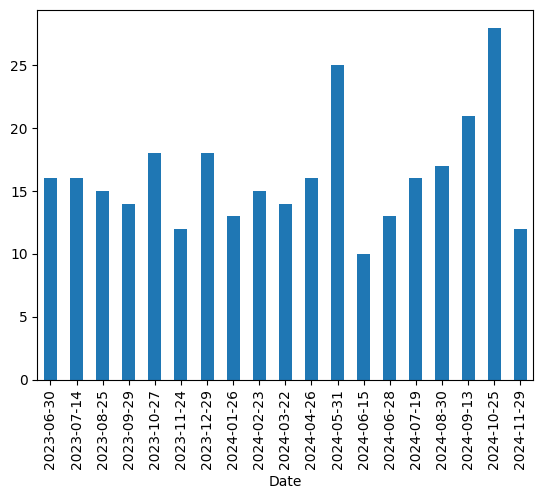

In [7]:
# Spieleranzahl pro Event
events_people_count = events_df["Date"].value_counts()[events_df["Date"].unique()]
events_people_count.plot.bar()

In [10]:
decks_df["AggroB"] = (decks_df["Aggro"] == 'TRUE').astype(int)
decks_df["TempoB"] = (decks_df["Tempo"] == 'TRUE').astype(int)
decks_df["MidrangeB"] = (decks_df["Midrange"] == 'TRUE').astype(int)
decks_df["ControlB"] = (decks_df["Control"] == 'TRUE').astype(int)
decks_df["ComboB"] = (decks_df["Combo"] == 'TRUE').astype(int)

decks_df["AggroV"] = (1/(decks_df["AggroB"] + decks_df["TempoB"] + decks_df["MidrangeB"] + decks_df["ControlB"] + decks_df["ComboB"]))*decks_df["AggroB"]
decks_df["TempoV"] = (1/(decks_df["AggroB"] + decks_df["TempoB"] + decks_df["MidrangeB"] + decks_df["ControlB"] + decks_df["ComboB"]))*decks_df["TempoB"]
decks_df["MidrangeV"] = (1/(decks_df["AggroB"] + decks_df["TempoB"] + decks_df["MidrangeB"] + decks_df["ControlB"] + decks_df["ComboB"]))*decks_df["MidrangeB"]
decks_df["ControlV"] = (1/(decks_df["AggroB"] + decks_df["TempoB"] + decks_df["MidrangeB"] + decks_df["ControlB"] + decks_df["ComboB"]))*decks_df["ControlB"]
decks_df["ComboV"] = (1/(decks_df["AggroB"] + decks_df["TempoB"] + decks_df["MidrangeB"] + decks_df["ControlB"] + decks_df["ComboB"]))*decks_df["ComboB"]

<Axes: title={'center': 'Archetypes 2024-11-29'}>

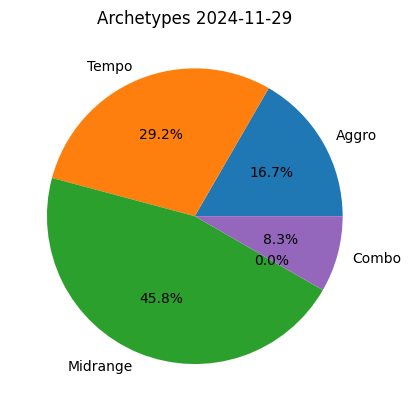

In [13]:
decks_of_last_event = events_df.loc[events_df["Date"] == events_df["Date"].iloc[-1]].merge(decks_df, how="left", on="Deck")
date_of_last_event = events_df["Date"].iloc[-1]
archetypevalues_of_last_event = decks_of_last_event[["AggroV", "TempoV", "MidrangeV", "ControlV", "ComboV"]].copy()
archetypevalues_of_last_event.sum().plot.pie(title="Archetypes " + date_of_last_event, autopct='%1.1f%%', labels=["Aggro", "Tempo", "Midrange", "Control", "Combo"])

In [16]:
# Top Top4 Finishers
top4_finishers = events_df.loc[events_df["Standing"] <= 4, ["Player"]]
regular_top4_finishers = top4_finishers.value_counts()
regular_top4_finishers

Player         
Michi S.           12
Raphael K.          9
Timo Bu.            8
Marvin H.           5
Martin G.           4
Luen T.             4
Michael K.          3
Tim R.              3
Wei Luen T.         3
Johannes Br.        2
Jean-Luc K.         2
Christopher Hö.     2
Henrik A.           1
Fabian W.           1
Basti B.            1
Aaron S.            1
Max R.              1
Matthias K.         1
Kai B.              1
Alexander R.        1
Christian K.        1
Christopher H.      1
Paul M.             1
Muhammed S.         1
Simon H.            1
Robert              1
Paul S.             1
Thomas S.           1
Timo Bl.            1
Wadim B.            1
Wolfgang K.         1
Yann P.             1
Name: count, dtype: int64

In [17]:
# Sieger
winners = events_df.loc[events_df["Standing"] <= 1, ["Player"]]
regular_winners = winners.value_counts()
regular_winners

Player         
Raphael K.         2
Michi S.           2
Timo Bu.           2
Aaron S.           1
Alexander R.       1
Johannes Br.       1
Christopher Hö.    1
Fabian W.          1
Jean-Luc K.        1
Martin G.          1
Luen T.            1
Kai B.             1
Marvin H.          1
Michael K.         1
Max R.             1
Paul S.            1
Simon H.           1
Name: count, dtype: int64

<BarContainer object of 3 artists>

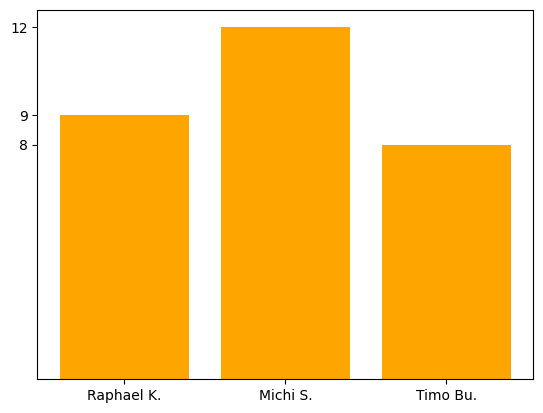

In [18]:
# Top Top4 Finishers, mit manueller Ausgabe
for_plot = pd.DataFrame({
    "Name": ["Raphael K.", "Michi S.", "Timo Bu."],
    "#Top4": [9, 12, 8],
})


fig, ax = plt.subplots()
ax.yaxis.set_ticks([8, 9, 12])
plt.bar(for_plot["Name"], for_plot["#Top4"], label="Top 4 Finishes", color='orange')